In [64]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [135]:
# Used to Ignore Unwanted Warnings
warnings.filterwarnings('ignore')

In [136]:
# Upload data and assign to variable named "Data"
data = pd.read_csv('train.csv')

In [137]:
# Sample is used to take sample rows of the DATASET
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
602,FDN27,20.85,Low Fat,0.000000,Meat,115.1808,OUT018,2009,Medium,Tier 3,Supermarket Type2,1054.6272
5276,FDH17,16.20,Regular,0.016653,Frozen Foods,97.3726,OUT046,1997,Small,Tier 1,Supermarket Type1,2055.3246
3352,FDZ51,11.30,Regular,0.054638,Meat,93.3094,OUT049,1999,Medium,Tier 1,Supermarket Type1,3046.7008
5902,NCJ29,10.60,Low Fat,0.035336,Health and Hygiene,87.0224,OUT018,2009,Medium,Tier 3,Supermarket Type2,1193.1136
2615,FDJ55,NaN,Regular,0.023417,Meat,223.8404,OUT027,1985,Medium,Tier 3,Supermarket Type3,7201.2928


## Find Shape of Our Dataset ( Number of Rows and No. of Columns)

In [138]:
data.shape

(8523, 12)

## Get Information about our Dataset like total number of rows , total number of columns , Datatypes of Each Column and Memory Requirement 

In [139]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Check Null Values in Dataset

In [140]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [141]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
# Lets calculate percentage of each column using DataFrame
per = data.isnull().sum()*100/len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


## Taking Care Of Duplicate Values

In [143]:
# In Pandas DataFrame we use Duplicated Method(Getting Boolean Values : True or False)
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [144]:
# any() is used in Boolean values to check that if the value is True. Here o/p is False indicating there no missing values
data.duplicated().any()

False

## Handling Missing Values

In [145]:
data['Item_Weight'] 

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [146]:
data['Outlet_Size'] 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

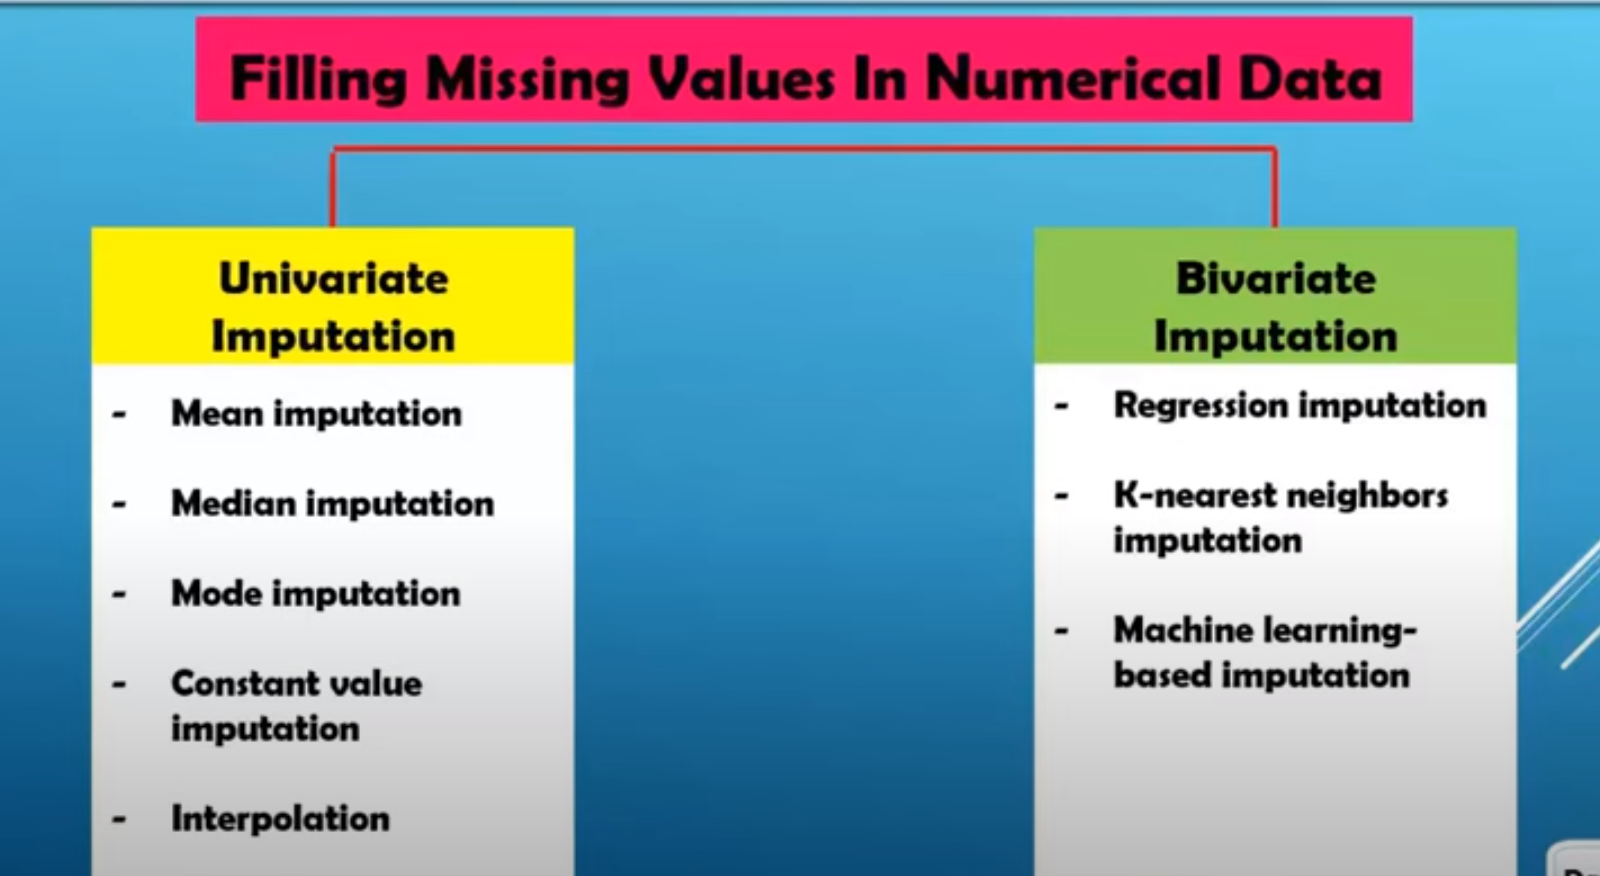

## Unvariante Imputation

In [147]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [148]:
print(mean_weight)
print(median_weight)

12.857645184135976
12.6


In [150]:
# Now lets's fill the missing values 
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [151]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


over here so so you can observe after applying mean and median imputation the
variance in our data tends to decrease that you can see here so reason is simple when you input missing values
with mean or median you effectively concentrate those inputed values around the central point right this reduces the
spread of values across the data set as more data points are clustered closer to
the central value as I said after applying mean or median input
the variance in our data set tends to decrease that you can see over here 21
to 17 that you can see over here however it is important to note that these changes should not result in a drastic
alternation of variance right as you know variance in this context signifies
the spread or distance of data points from the average value so just remember
as I said it is important to not that these changes should not result in a drastic alternation of the variance that
you can see over here here we can say there is no drastic alternation of the variance right that you can see over
here also we have to check distribution of the data after and before filling the
missing values using mean and median there should not drastic change in the distribution of the data let's check

In [152]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


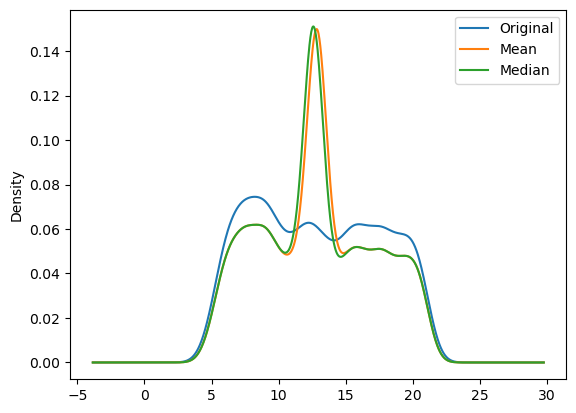

In [153]:
data['Item_Weight'].plot(kind = 'kde',label = "Original")

data['Item_Weight_mean'].plot(kind = 'kde',label = "Mean")

data['Item_Weight_median'].plot(kind = 'kde',label = "Median")
plt.legend()
plt.show()

<AxesSubplot:>

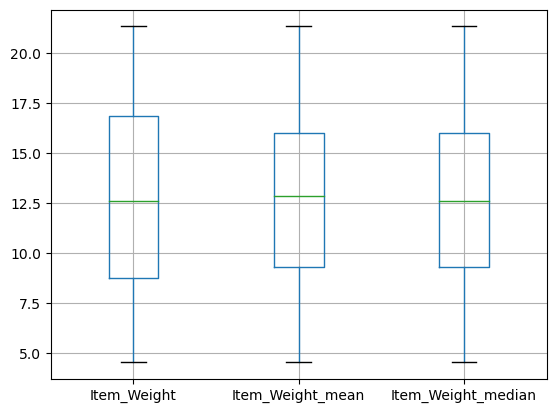

In [154]:
'''execute this cell as you can see here after filling the missing values using mean and median you can observe a
reduction in the spread of the data that you can see over here which is not desirable that you can see over here so lets do with other method'''
# Creating Box Plot 
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [155]:
# We are using interpolate method of pandas 
data['Item_Weight_Interpolate'] = data['Item_Weight'].interpolate(method = 'linear')

as you can see here we are applying linear interpolation method to fill the missing values in this particular column
item_weight linear interpolation estimates missing values in data set by drawing a straight line
between two neighboring data points and fill in the missing values with the values along that line let me execute
this cell let's use KD plot once again to compare the original distribution of the item weight variable with the
distribution after interpolate so let me copy this F statements and let me paste it over here so we are keeping as it is

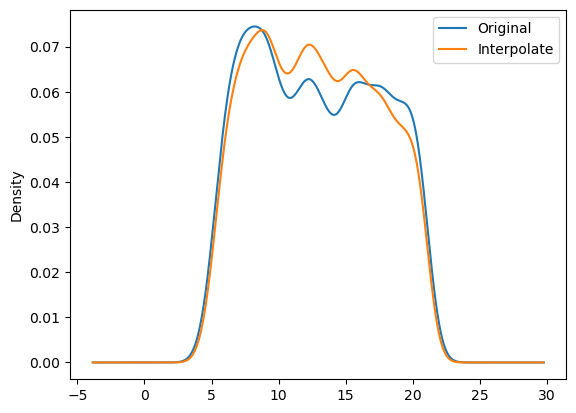

In [156]:
data['Item_Weight'].plot(kind = 'kde',label = "Original")

data['Item_Weight_Interpolate'].plot(kind = 'kde',label = "Interpolate")
plt.legend()
plt.show()

## Multivariate Imputation

Something about K nearest neighbor imputer the K nearest neighbors imputer is a method that can be used to fill
missing numerical values in a data set it works by identifying the K nearest data points with available values for
the missing entry and then compute an average or weighted average of those values to fill the missing entry this
imputation technique is based on the principle that the similar data points often have similar values so let's use

In [157]:
from sklearn.impute import KNNImputer 

In [158]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [159]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

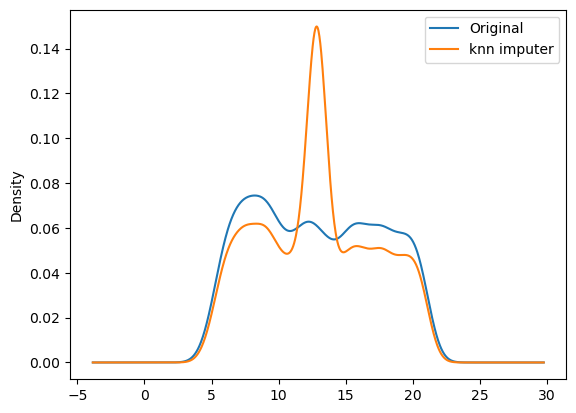

In [161]:
data['Item_Weight'].plot(kind = 'kde',label = "Original")

data['knn_imputer'].plot(kind = 'kde',label = "knn imputer")
plt.legend()
plt.show()

In [92]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [162]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_Interpolate,knn_imputer
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3,9.3


In [163]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
Item_Weight_Interpolate         0
knn_imputer                     0
dtype: int64

## Outlet Size

In [164]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [165]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [166]:
mode_outlet = data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc = (lambda x:x.mode()[0]))

In [167]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [168]:
missing_values = data['Outlet_Size'].isnull()

In [169]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [170]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [171]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
Item_Weight_Interpolate         0
knn_imputer                     0
dtype: int64

## Item_Fat_Content 

In [172]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_Interpolate', 'knn_imputer'],
      dtype='object')

 As you can see over here Low Fat are 3 and regular duplicate is 1. so we need to have one common variable

In [173]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Replacing variable with LF(Low Fat) and We are using Dictionary here and Inplace is used to modify changes in existing DataFrame.

In [174]:
data.replace({'Item_Fat_Content':{'Low Fat' : 'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [175]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Item_Visibility

In [176]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_Interpolate', 'knn_imputer'],
      dtype='object')

In [177]:
data['Item_Visibility'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64>

**We are replaceing values of 526 --> Zero's with np.nan values and then that values are filled with Linear Interpolation
'''Interpolation is a method for generating points between given points.
For example: for points 1 and 2, we may interpolate and find points 1.33 and 1.66.
Interpolation has many usage, in Machine Learning we often deal with missing data in a dataset, interpolation is often used to substitute those values.
This method of filling values is called imputation.
Apart from imputation, interpolation is often used where we need to smooth the discrete points in a dataset.**

In [178]:
data['Item_Visibility_Interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method = 'linear')

In [179]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_Interpolate,knn_imputer,Item_Visibility_Interpolate
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3,9.3,0.016047


Lets us check distribuation after and before interpolation

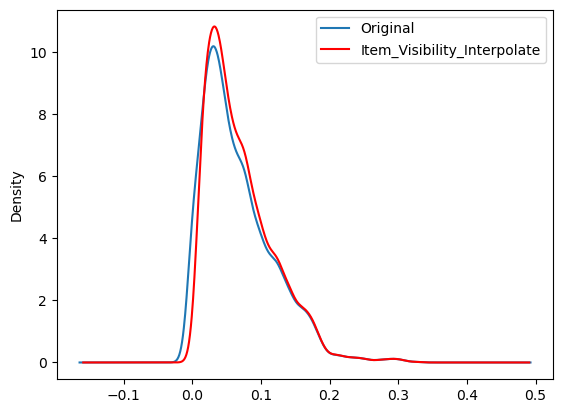

In [109]:
data['Item_Visibility'].plot(kind = 'kde',label = 'Original')
data['Item_Visibility_Interpolate'].plot(kind = 'kde', color ='red',label ='Item_Visibility_Interpolate')
plt.legend()
plt.show()

In [110]:
data = data.drop('Item_Visibility',axis=1)

In [111]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


## Item_Type

In [112]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [113]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Item_Identifier

In [114]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [115]:
# We are unique code for each item starting with FD DR AND NC ...
data['Item_Identifier'].value_counts().sample(5)

FDG53    6
DRH03    6
FDD21    6
FDV20    8
FDQ22    3
Name: Item_Identifier, dtype: int64

In [116]:
# So now let is reduce it to first two items letters only
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x:x[:2])

In [117]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

FD - FOOD , NC - NON - CONSUMABLES , DR - DRINKS

## Outet_Establishment_Year

In [118]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [119]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

**Now here we are seeing Establishment Year of each outlet 
We have to see the overall age of each outlet**

In [120]:
import datetime as dt

In [121]:
current_year = dt.datetime.today().year
current_year

2023

In [122]:
data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']

In [123]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,24


**Now we have got the age of each outlet and now we do not need column Outlet_Establishment_Year
So we need to drop that column**

In [124]:
data = data.drop('Outlet_Establishment_Year',axis = 1)

In [125]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,24


## Handling Catagorical Columns

cell now done as you can see our data set contains many categorical
columns so we have to handle this categorical columns so let's do this so
let's perform categorical data encoding using ordinal encoding means here we are
going to use ordinal encoding as you know machine learning algorithms can understand only numerical values so
categorical data such as labels or categories need to be transformed into
numerical representation for machine learning models to process them effectively right so that's why here we
are going to convert categorical values to numerical values so machine learning models can process them effectively as I
said we are going to use ordinal encoding ordinal encoding is a way to
assign unique numerical values to each category so the question is why ordinal
encoding can we use label encoding here let's check what skarn is telling about
this as you can see here currently I am on sar.org and label ncoder ncode Target
labels with value between zero and N classes minus one please read it
carefully enode Target labels so this Transformer should be used to encode
Target values Y and not the input X so here we are going to perform encoding on
input variables not on the target variable that's why here we are using
ordinal encoder in place of label encoder as you can see SK learn is
telling this Transformer means this label encoder should be used to encode
Target values means dependent variable not the input means not the independent
variables so that's why here we are using ordinal encoder not label encoder

###### Categorical Data Encoding is a process of converting categorical data, which represents categories or labels, into a numerical format that machine learning algorithms can work with. Two common methods for categorical data encoding are Label Encoding and Ordinal Encoding. Let's break down each method with simple examples: 

###### Ordinal Encoding: Ordinal Encoding is used when you have categorical data that has a natural order or ranking among its categories. It assigns numerical values to categories based on their relative order. For instance, if you have an "Size" column with categories "Small," "Medium," and "Large," you can assign 0, 1, and 2 to these categories, respectively.

Example:
Original Data:
Size
Small
Medium
Large

Ordinal Encoded Data:
Size
0
1
2


###### Label Encoding: Label Encoding is used when you have categorical data with no inherent order or ranking. In this method, each category is assigned a unique integer label. For example, if you have a "Color" column with categories like "Red," "Green," and "Blue," you could encode them as 0, 1, and 2, respectively. Example:Original Data:
Color
Red
Green
Blue

Label Encoded Data:
Color
0
1
2

###### Here's a simple summary of when to use each method: Use Label Encoding for non-ordinal categorical data where the categories have no inherent order or ranking, like "Color," "Gender," or "Country." . Use Ordinal Encoding for ordinal categorical data where the categories have a meaningful order or ranking, like "Size" (e.g., "Small," "Medium," "Large") or "Education Level" (e.g., "High School," "Bachelor's," "Master's," "Ph.D.").

In [126]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [127]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,24


In [128]:
X = data_encoded.drop('Item_Outlet_Sales', axis = 1)
y = data_encoded['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**In the machine learning context, 'X' is typically used for features (attributes) that you use to make predictions, and 'y' is the target variable you are trying to predict. In your example, 'X' represents the features of houses (e.g., Square_Feet, Bedrooms, Bathrooms, Year_Built), and 'y' represents the sale prices of these houses.**

**By splitting the data this way, you can train a machine learning model using 'X' to predict 'y,' which is the sale price of houses based on their attributes.**


## Random Forest Regressor 

In [130]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


**OUTPUT EXPLAINATION**
The output value "0.5549992903957147" you obtained is the mean of the R-squared (R^2) scores from your cross-validation. The R-squared score measures how well your RandomForestRegressor model fits the data.

In this context:
An R-squared score of 0 indicates that the model doesn't explain any of the variance in the target variable (i.e., it's a poor fit).
An R-squared score of 1 means that the model perfectly explains the variance in the target variable (i.e., it's an excellent fit).
An R-squared score between 0 and 1 indicates the proportion of the variance in the target variable that your model can explain.
So, in your case, an R-squared score of approximately 0.554 suggests that your RandomForestRegressor model is reasonably good at explaining and predicting the variation in the target variable (Sale_Price in your example), but there's still some room for improvement.

The closer the R-squared score is to 1, the better your model is at making accurate predictions. You can further improve the model by tuning hyperparameters, selecting more relevant features, or using different algorithms.

**CODE EXPLAINATION :**
Certainly! This code is using scikit-learn to build a machine learning model called a RandomForestRegressor and evaluate its performance using cross-validation. Let me break it down in a simple way:

1. `from sklearn.ensemble import RandomForestRegressor`: This line imports the RandomForestRegressor, which is a machine learning model that can be used for regression tasks. Regression is about predicting numerical values (like house prices).

2. `from sklearn.model_selection import cross_val_score`: This imports a function from scikit-learn that helps assess how well a model performs.

3. `rf = RandomForestRegressor(n_estimators=100, random_state=42)`: This line creates a RandomForestRegressor model with 100 decision trees (n_estimators) and sets the random seed (random_state) to 42. A RandomForestRegressor is an ensemble of decision trees that can make predictions.

4. `scores = cross_val_score(rf, X, y, cv=5, scoring='r2')`: Here's what each part of this line does:
   - `cross_val_score` is a function for cross-validation, which is a technique to assess how well a model generalizes to new data.
   - `rf` is the model you want to evaluate (the RandomForestRegressor).
   - `X` is your feature data (e.g., house attributes like Square_Feet, Bedrooms, Bathrooms, Year_Built).
   - `y` is your target variable (e.g., Sale_Price).
   - `cv=5` specifies that you want to use 5-fold cross-validation. This means your dataset is split into 5 parts, and the model is trained and tested 5 times.
   - `scoring='r2'` specifies that you want to use the R-squared (R^2) score as the evaluation metric. R-squared measures how well your model fits the data, with values closer to 1 indicating a better fit.

The `cross_val_score` function will return an array of scores, one for each of the 5 cross-validation runs. These scores tell you how well the model is performing on each fold of your data.

In summary, this code creates a RandomForestRegressor model, then uses cross-validation to evaluate how well the model can predict house prices (Sale_Price) based on the provided house attributes (X). The R-squared score is used to measure the model's performance.

In the code snippet you provided:

```python
rf = RandomForestRegressor(n_estimators=100, random_state=42)
```

`random_state` is a parameter that is used to set the random seed for the random number generator used by the `RandomForestRegressor`. The specific value you provide, in this case, `42`, ensures that the random processes within the RandomForestRegressor are reproducible. Here's what it means in simple terms:

1. **Reproducibility**: Machine learning models like random forests involve randomness, such as random selection of data samples and features during training. This randomness can make results slightly different each time you run the model.

2. **Random Seed**: By setting `random_state` to a fixed value (like `42`), you make sure that the random processes in the model always start from the same initial state. This means that every time you run the model with the same data and the same `random_state`, you will get the same results. This is important for reproducibility and debugging.

3. **Choosing a Value**: You can choose any integer as the value for `random_state`. The number itself doesn't matter; what matters is that it's consistent. People often use common values like `0`, `42`, or other numbers, but you can choose any integer you like.

In your code, setting `random_state=42` ensures that if you or someone else runs the same code with the same data, you'll get the same results every time, making your experiments and results more consistent and easier to reproduce.

## XGBRF Regressor

In [184]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


Certainly! The code you provided uses XGBoost, a popular machine learning library, to create a regression model. It then assesses the model's performance using cross-validation and calculates the mean R-squared score. Here's a simple explanation:

1. **Import the XGBoost Library**: You start by importing the XGBoost library, which is a powerful tool for building machine learning models.

2. **Create an XGBoost Regression Model**: You create a specific type of regression model called a "Random Forest Regressor" from XGBoost. This model is designed to predict numerical values (like house prices) based on input features.

3. **Set Model Parameters**: You configure the model to have 100 trees (a parameter that affects how it works) and set the random seed to 42 for reproducibility (so you get the same results if you run the code again).

4. **Evaluate the Model**: You use cross-validation to assess how well the model performs. Cross-validation is like testing the model on multiple different parts of your data to get a more accurate picture of its performance.

5. **Calculate the Mean R-squared Score**: The code calculates the mean R-squared score. R-squared measures how well the model fits your data, with higher values indicating a better fit. The code prints this mean score.

The output you get represents how well the XGBoost model predicts your data. A higher R-squared score is better, meaning the model is doing a good job at making predictions based on the input features.

## XGBRF Feature Importance

In [186]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_Age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_Interpolate,0.002493
8,Item_Weight_Interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


The code you've provided uses the XGBoost Random Forest Regressor (XGBRFRegressor) to calculate feature importances for a given dataset. It then organizes these feature importances in a DataFrame. Let me explain this code in a simple way with an example:

Suppose you have a dataset with various features (e.g., bedrooms, square footage, and year built) and the target variable (e.g., house price). You want to understand which features are most important in predicting house prices using the XGBoost Random Forest Regressor.

Here's what the code does step by step:

1. **Create an XGBoost Random Forest Regressor**:
   - You create an XGBRFRegressor model named `xg` with specific settings:
     - `n_estimators=100`: This means your model will consist of 100 decision trees.
     - `random_state=42`: Setting a random state ensures reproducibility of your results.

2. **Fit the Model to Your Data**:
   - You train the `xg` model with your feature data (`X`) and the corresponding target variable (`y`). This step helps the model learn from your dataset.

3. **Calculate Feature Importances**:
   - XGBoost provides a way to assess the importance of each feature in making predictions. You calculate the importance of each feature using `xg1.feature_importances_`, where `xg1` is the fitted model. This gives you a list of feature importances.

4. **Create a DataFrame to Organize the Results**:
   - You create a DataFrame to organize the feature importances, making it easier to understand which features are the most important. Each row in the DataFrame contains a feature and its corresponding importance value.

5. **Sort and Display the Results**:
   - You sort the DataFrame by the 'XGBRF_importance' column in descending order to see the most important features at the top. This helps you identify which features have the greatest impact on predicting house prices.

The resulting DataFrame provides insights into the importance of each feature in predicting house prices. Features with higher importance values are more influential in the predictions, and those at the top of the list are the most important.

By analyzing feature importances, you can make informed decisions about which features to focus on when working with your dataset or improving your predictive model.

In [187]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [190]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_Interpolate','Item_Weight_Interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [194]:
final_data = X.drop(columns = ['Item_Visibility_Interpolate','Item_Weight_Interpolate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis =1)

In [195]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,24
1,48.2692,3.0,1.0,2.0,14
2,141.6180,9.0,1.0,1.0,24
3,182.0950,0.0,2.0,0.0,25
4,53.8614,1.0,0.0,1.0,36
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,36
8519,108.1570,7.0,2.0,1.0,21
8520,85.1224,6.0,2.0,1.0,19
8521,103.1332,3.0,1.0,2.0,14


  ## Best Model

In [196]:
from xgboost import XGBRFRegressor

In [199]:
xg_final = XGBRFRegressor()

In [200]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

It looks like you've imported two useful modules for working with machine learning:

1. **`train_test_split` from `sklearn.model_selection`**: This function is used to split your dataset into two parts: one for training your machine learning model and the other for testing its performance. It's an important step in evaluating and optimizing your model. You can use it like this:

   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

   - `X` is your feature data.
   - `y` is your target variable.
   - `test_size` specifies the proportion of the dataset to be used for testing (e.g., 0.2 means 20% of the data for testing).
   - `random_state` ensures reproducibility.

2. **`mean_absolute_error` from `sklearn.metrics`**: This is a metric used to evaluate the performance of a regression model. It calculates the average absolute difference between the predicted values and the actual target values. It's a way to measure how far off your predictions are from the actual values.

   After you've trained your model and made predictions, you can calculate the mean absolute error like this:

   ```python
   from sklearn.metrics import mean_absolute_error

   y_pred = model.predict(X_test)  # Make predictions using your model
   mae = mean_absolute_error(y_test, y_pred)  # Calculate the mean absolute error
   ```

   - `y_test` represents the actual target values for your test dataset.
   - `y_pred` is the predicted values from your model for the test dataset.
   - `mae` is the mean absolute error.

These tools are essential for evaluating and fine-tuning your machine learning models, helping you understand how well your model is performing and where it can be improved.

In [202]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

It looks like you're using the `train_test_split` function to split your dataset into training and testing sets. This is a common practice in machine learning. Let's break down the code you provided:

```python
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.20, random_state=42)
```

Here's what each part of the code does:

- `X_train` and `y_train`: These variables will store the feature data (input) and target variable (output) for your training set. The `train_test_split` function will randomly select a portion of your data for training.

- `X_test` and `y_test`: These variables will store the feature data and target variable for your testing set. The remaining portion of your data that was not included in the training set will be used for testing.

- `train_test_split(final_data, y, test_size=0.20, random_state=42)`: This is the `train_test_split` function call. It takes the following arguments:
  - `final_data`: This is your feature data, which represents the input features for your machine learning model.
  - `y`: This is your target variable, which represents what you're trying to predict (e.g., house prices).
  - `test_size=0.20`: This parameter specifies that you want to allocate 20% of your data to the testing set, while the remaining 80% will be used for training.
  - `random_state=42`: This parameter sets the random seed to 42, ensuring that the data split is the same each time you run the code (for reproducibility).

After executing this code, you will have your data split into training and testing sets. You can use the training set to train your machine learning model and the testing set to evaluate its performance. This process helps you determine how well your model generalizes to new, unseen data.

In [203]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

It looks like you're fitting (training) your XGBoost model (`xg_final`) with your training data. Here's what this code does:

```python
xg_final.fit(X_train, y_train)
```

- `xg_final`: This is your XGBoost regression model that you previously created and configured.

- `X_train`: This is the training set of your feature data. It contains the input features used to train your model. The model will learn from this data to make predictions.

- `y_train`: This is the training set of your target variable. It contains the actual values you're trying to predict. The model will learn to make predictions based on these values.

By calling `xg_final.fit(X_train, y_train)`, you are training your XGBoost model using the provided training data. This process involves the model learning patterns and relationships in the data, enabling it to make predictions based on the input features (X_train) and compare them to the actual target values (y_train).

After this step, your model will be ready for making predictions on new or unseen data. The training process allows it to generalize from the training data to make predictions on similar but unseen examples.

In [204]:
y_pred = xg_final.predict(X_test)

It appears you are using your trained XGBoost model, `xg_final`, to make predictions on your test dataset. Here's an explanation of the code:

```python
y_pred = xg_final.predict(X_test)
```

- `xg_final`: This is your trained XGBoost regression model.

- `X_test`: This is your test dataset, containing the feature data (input) that you want to use for making predictions. These are typically new or unseen examples that the model hasn't encountered during training.

- `y_pred`: This variable will store the predicted values for your test dataset. After running this line of code, `y_pred` will contain the model's predictions for the target variable based on the input features in the test dataset.

You can now use the `y_pred` values to compare the model's predictions to the actual target values in your test dataset, typically to evaluate the model's performance. This comparison can be done using evaluation metrics like mean absolute error (MAE), mean squared error (MSE), or R-squared (R^2) to assess how well the model is predicting the target variable.

In [205]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

The `mean_absolute_error` function calculates the mean absolute error (MAE), which is a metric used to measure the average absolute difference between the predicted values and the actual (true) values. Here's what the code you provided does:

```python
mean_absolute_error(y_test, y_pred)
```

- `y_test`: This is your true target variable values from the test dataset. It represents the actual values you're trying to predict.

- `y_pred`: This is the predicted target variable values generated by your XGBoost model for the same test dataset.

By running `mean_absolute_error(y_test, y_pred)`, you're calculating the average absolute difference between the true target values (`y_test`) and the predicted values (`y_pred`). The MAE provides a measure of how far off your model's predictions are from the actual values on average.

A lower MAE indicates that your model's predictions are closer to the true values, while a higher MAE suggests that the predictions are less accurate. This metric is useful for evaluating the performance of your machine learning model, especially in regression tasks where you want to assess how well your model predicts numerical values.4

**OUTPUT explained**
Great! If your dataset is based on Big Mart sales, then the mean absolute error (MAE) value of approximately 714.42 that you obtained indicates that, on average, your model's predictions for sales are about $714.42 off from the actual sales figures in your test dataset.

In the context of sales prediction, a lower MAE is typically desirable, as it signifies that your model's predictions are, on average, closer to the actual sales figures. It's a useful metric to assess how accurately your model can predict sales, and you can use it to evaluate and refine your sales forecasting model further.

## Prediction on Unseen Data

In [206]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [207]:
print(f"Sales Value is between {pred-713.95} and {pred+713.95}")

Sales Value is between 1353.13642578125 and 2781.03642578125


## Save Model Using Joblib

In [208]:
import joblib

In [209]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [210]:
model = joblib.load('bigmart_model')

In [211]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [212]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.66642578125 and 2781.50642578125


## GUI

In [ ]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()